### 4.10 Part 1.25 Yang Loyal Consumer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','0YLC.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [5]:
df.shape

(3815770, 30)

In [6]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,3.815770e+06,3.815770e+06,3.815770e+06,3.815770e+06,3.815770e+06,3.815770e+06
mean,1.024431e+05,2.901497e+01,7.110112e+04,2.551685e+04,3.234246e+01,1.052552e+01
std,5.994546e+04,6.648246e+00,2.528649e+04,1.406407e+04,2.166153e+01,7.454621e+01
min,1.700000e+01,1.800000e+01,2.595500e+04,0.000000e+00,1.000000e+00,2.387671e+00
25%,4.980800e+04,2.300000e+01,5.679500e+04,1.351200e+04,1.500000e+01,7.432517e+00
50%,1.030540e+05,2.900000e+01,6.947100e+04,2.508700e+04,3.000000e+01,7.816157e+00
75%,1.545210e+05,3.500000e+01,8.448400e+04,3.775000e+04,4.500000e+01,8.193416e+00
max,2.062060e+05,4.000000e+01,3.953600e+05,4.968800e+04,1.000000e+02,8.794882e+03


### 3 -Analyzing YLC by Frequent Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','fam_status','frequent_flag']]

In [8]:
df11=df1.drop_duplicates().reset_index()

In [9]:
df11

,index,user_id,fam_status,frequent_flag
0,1163,127020,married,Frequent customer
1,1933,19666,married,Frequent customer
2,2693,202887,living with parents and siblings,Frequent customer
3,6973,33626,living with parents and siblings,Frequent customer
4,8470,100536,living with parents and siblings,Frequent customer
...,...,...,...,...
6313,6520424,197161,single,Frequent customer
6314,6521307,94601,married,Frequent customer
6315,6523031,179310,married,Frequent customer
6316,6523432,33960,living with parents and siblings,Frequent customer


#### -analyzing YLC by Frequent_flag and Family Status based on customers number

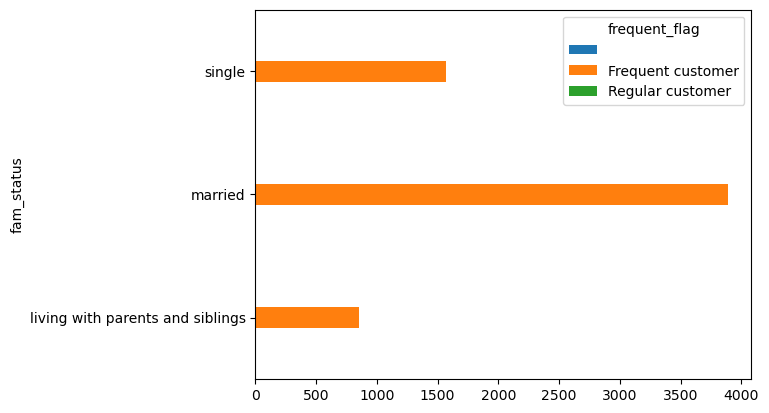

In [10]:
bar12=df11.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [11]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_LoyaltyFlag.png'))

In [12]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status                        frequent_flag    
living with parents and siblings  Frequent customer     851
                                                          1
married                           Frequent customer    3889
                                                          4
                                  Regular customer        2
single                            Frequent customer    1567
                                                          4
Name: frequent_flag, dtype: int64

### -analyzing YLC by Frequent flag and Family Status based on purchase number

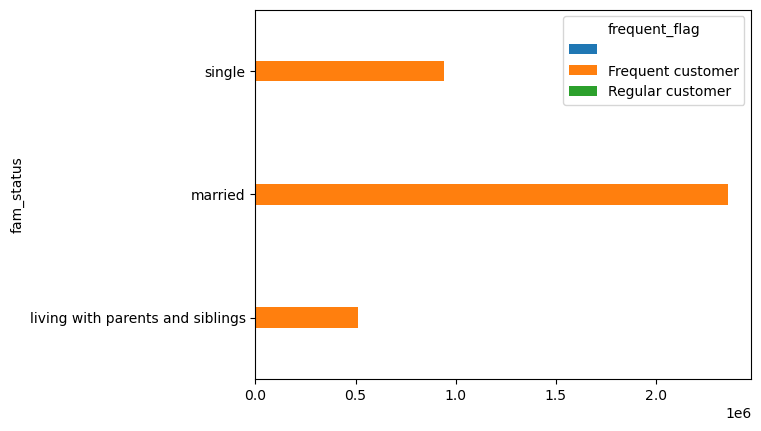

In [13]:
bar12=df1.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [16]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_LoyaltyFlagSales.png'))

In [15]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status                        frequent_flag    
living with parents and siblings  Frequent customer     851
                                                          1
married                           Frequent customer    3889
                                                          4
                                  Regular customer        2
single                            Frequent customer    1567
                                                          4
Name: frequent_flag, dtype: int64

### 4 -analyzing YLC purshases by their income

In [17]:
df2=df[['prices', 'income']]

In [18]:
df2['prices'].sum()

40088735.8

In [19]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [20]:
df22

,mean_purshase
income,
25955,6.889567
26293,6.936534
26439,6.815939
26476,6.920161
26580,6.719850
...,...
362619,36.861034
369155,81.996020
373234,840.171739


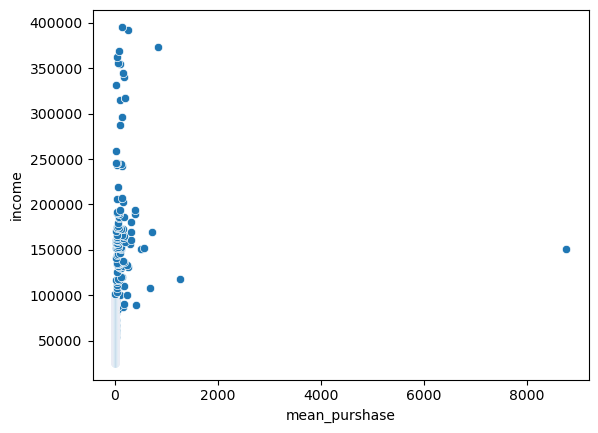

In [21]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [22]:
df22filtered=df22[df22['mean_purshase']<2000]

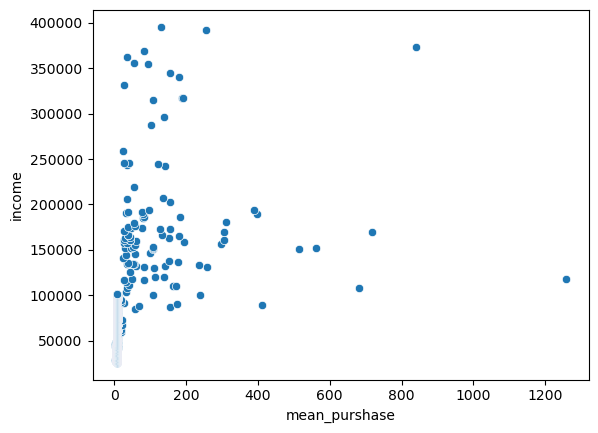

In [23]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [24]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_PricesIncome.png'))

### 5 - Analyzing YLC by Busiest_day

In [25]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [26]:
df4

,user_id,STATE,busiest_day,day_of_week
1163,127020,Ohio,Busiest days,0
1164,127020,Ohio,Busiest days,1
1165,127020,Ohio,Regularly days,6
1166,127020,Ohio,Regularly days,2
1167,127020,Ohio,Regularly days,6
...,...,...,...,...
6459954,77311,Vermont,Slowest days,3
6459955,77311,Vermont,Busiest days,0
6459956,77311,Vermont,Regularly days,5
6459957,77311,Vermont,Busiest days,1


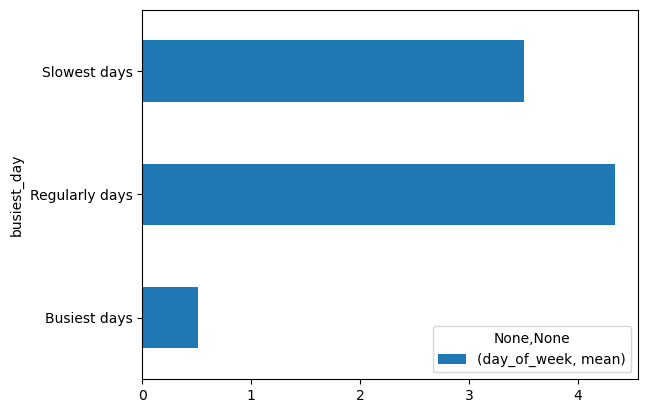

In [27]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [29]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_BusiestDayOfWeek.png'))

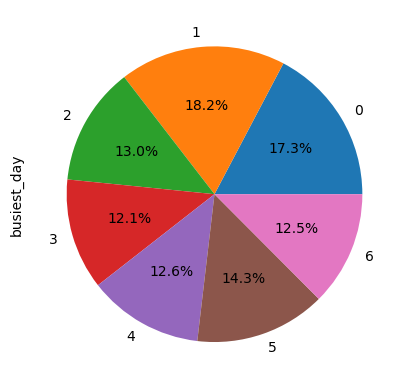

In [28]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [30]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    659585
1    693329
2    494211
3    463405
4    480424
5    546818
6    477998
Name: busiest_day, dtype: int64

In [31]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_pieBusiestDayOfWeek.png'))

### -YLC prefered hour of day

In [32]:
df44=df[['order_hour_of_day','user_id']]

In [33]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      24303
1      11679
2       6934
3       5093
4       6070
5      10661
6      42850
7     125809
8     235792
9     327086
10    348945
11    324703
12    299480
13    305522
14    312139
15    304408
16    276867
17    215023
18    164550
19    131632
20    115331
21     97743
22     78099
23     45051
Name: user_id, dtype: int64

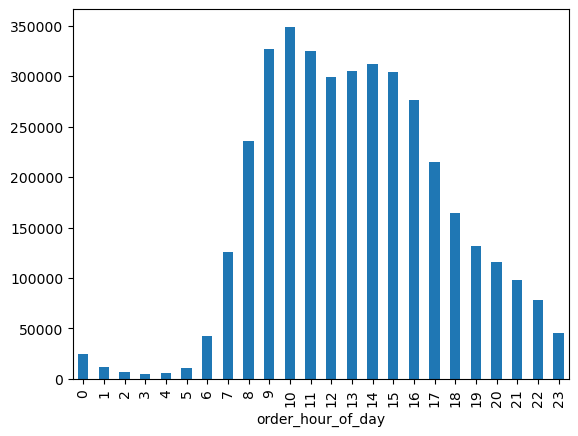

In [34]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [35]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_BusiestHourOfDay.png'))

### 6 - Analyzing number of YLC by State

In [36]:
df5=df[['user_id','STATE']]

In [37]:
DF5=df5.drop_duplicates().reset_index()

In [38]:
DF5

,index,user_id,STATE
0,1163,127020,Ohio
1,1933,19666,Oklahoma
2,2693,202887,District of Columbia
3,6973,33626,Kansas
4,8470,100536,Indiana
...,...,...,...
6313,6520424,197161,Vermont
6314,6521307,94601,Virginia
6315,6523031,179310,Utah
6316,6523432,33960,Utah


#### number of rows indicate total number of YLC =6318

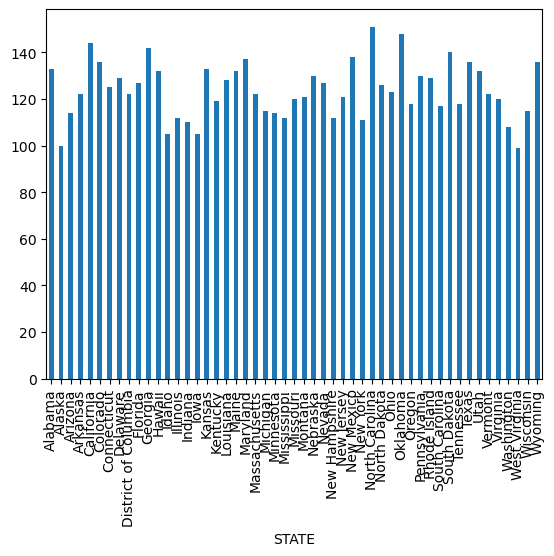

In [39]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [40]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 133
Alaska                  100
Arizona                 114
Arkansas                122
California              144
Colorado                136
Connecticut             125
Delaware                129
District of Columbia    122
Florida                 127
Georgia                 142
Hawaii                  132
Idaho                   105
Illinois                112
Indiana                 110
Iowa                    105
Kansas                  133
Kentucky                119
Louisiana               128
Maine                   132
Maryland                137
Massachusetts           122
Michigan                115
Minnesota               114
Mississippi             112
Missouri                120
Montana                 121
Nebraska                130
Nevada                  127
New Hampshire           112
New Jersey              121
New Mexico              138
New York                111
North Carolina          151
North Dakota            126
Ohio          

#### -defining 10 Top States

In [41]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
North Carolina    151
Oklahoma          148
California        144
Georgia           142
South Dakota      140
New Mexico        138
Maryland          137
Wyoming           136
Texas             136
Colorado          136
Name: user_id, dtype: int64

#### -saving the plot

In [42]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_UsersNumberState.png'))

### 7 - Analyzing YLC by n_dependants

In [43]:
df6=df[['user_id', 'n_dependants']]

In [44]:
DF6=df6.drop_duplicates()

In [45]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    1571
1    1544
2    1583
3    1620
Name: user_id, dtype: int64

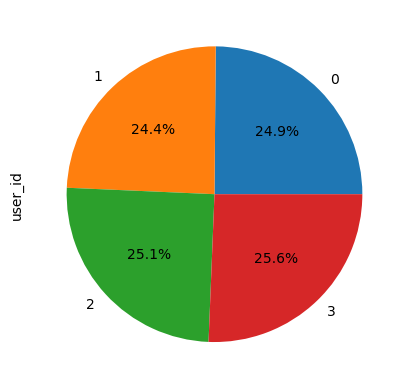

In [46]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [47]:
DF6

,user_id,n_dependants
1163,127020,3
1933,19666,3
2693,202887,3
6973,33626,2
8470,100536,3
...,...,...
6520424,197161,0
6521307,94601,1
6523031,179310,1
6523432,33960,1


#### saving the plot

In [48]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_NDependansUsers.png'))

### 8 - Analyzing YLC Days since prior order

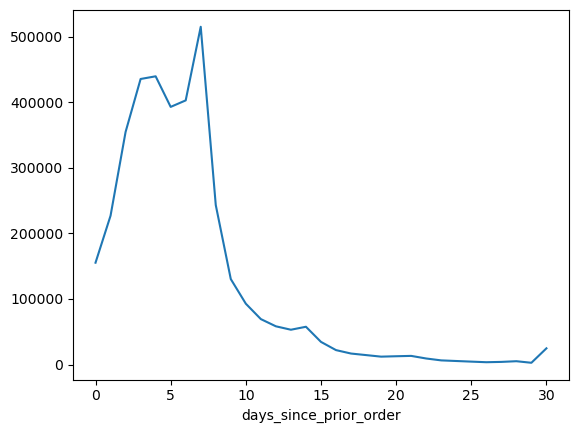

In [49]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [50]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     155196
1     226833
2     354507
3     435282
4     439362
5     392738
6     402643
7     514864
8     243119
9     130249
10     92708
11     69223
12     58240
13     53021
14     57544
15     34485
16     21961
17     16719
18     14360
19     11992
20     12602
21     13136
22      9168
23      6285
24      5342
25      4402
26      3492
27      3975
28      5028
29      2634
30     24660
Name: days_since_prior_order, dtype: int64

In [51]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_DaysSincePriorOrder.png'))

### 9- Defining YLC TOP products for client group


 #### creating subset

In [52]:
df18=df[['product_name','product_id','prices']]

In [53]:
df18

,product_name,product_id,prices
1163,9.5 pH Super Hydrating Purified Water,1096,9.9
1164,9.5 pH Super Hydrating Purified Water,1096,9.9
1165,9.5 pH Super Hydrating Purified Water,1096,9.9
1166,9.5 pH Super Hydrating Purified Water,1096,9.9
1167,9.5 pH Super Hydrating Purified Water,1096,9.9
...,...,...,...
6459954,Organic Whole Wheat Fusilli Pasta,48802,6.1
6459955,Organic Whole Wheat Fusilli Pasta,48802,6.1
6459956,Barbecue Veggie Burgers,48869,9.3
6459957,Organic Half & Half,49235,1.8


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [54]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(10)

In [73]:
DF18

,product_name,prices
0,Banana,2341
1,Lowfat 2% Milkfat Cottage Cheese,1475
2,Bag of Organic Bananas,1241
4,Small Hass Avocado,595
5,100% Whole Wheat Bread,579
6,Blueberries,552
7,2% Reduced Fat Milk,525
8,Organic Avocado,522
9,Large Lemon,520
10,Organic Fuji Apple,487


In [55]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [56]:
DF18

,product_name,count_orders
0,Banana,57894
1,Bag of Organic Bananas,52368
2,Organic Strawberries,38882
3,Organic Hass Avocado,30874
4,Organic Baby Spinach,29391
5,Organic Whole Milk,21211
6,Organic Raspberries,20482
7,Organic Avocado,19504
8,Limes,16919
9,Large Lemon,16743


#### -creating plot

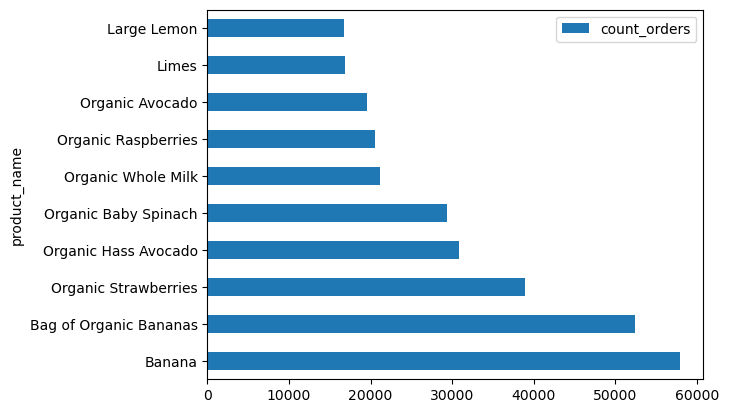

In [57]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [58]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'YLC_Products.png'))